# Phonology Mixed Sets -- Family vs. Fake Feature

In [50]:
from locator import *
from scipy.stats import ttest_ind,spearmanr
from phonstats import agstats
%matplotlib inline

### Sample Space
The following statistics are on a collection of 1500 feature-sets picked **at random** from the 23,000 feature sets of phonological features.
So all these sets are:
   
   - made of phonological feature (no restriction)
   
   - have a spectral index of 5 or more (by pca)
   
   - cover at least 200 languages

They were not selected for genetic separation!

To make the comparison fair, the bogus features were assigned to the languages in the top 2 families by matching proportions. That is to say, if for example a set covers 100 languages, of which the most common family is Indo-European with 20 languages and the second most common is Sino-Tibetan with 18 languages, then 20 random languages from those 38 were assigned the property "bogus-1" and the other 18 were assigned "bogus-2". The bogus silhouette is therefore the best silhoutte among the following computational parameters:

 - -1: language is represented in the original feature space, eucledian distance
 - 0: language is represented in the original feature space, manhatten distance
 - *i* in [1 -- number of categories]: language is represented by it's projection on *i* PCs,  eucledian distance

of course, the genetic silhouette is the same, only the labels are the real language families.

In [51]:
groups = pd.read_pickle('feature-sets/phon200-1500-rnd-samefams.pkl')

In [29]:
gstats = list()
for g in groups:
    g._fmode = 'true'
    g.determine_spectral_data()
    top2fams = g.families.most_common(2)
    gensilpca = g.best_silhouette('genetic')
    bogsilpca = g.best_silhouette('bogus')
    gstats.append({
        'spectral index' : g.quality_index,
        'genetic silhouette' : gensilpca[0],
        'genetic silhouette dims' : gensilpca[1],
        'bogus silhouette' : bogsilpca[0],
        'bogus silhouette dims' : bogsilpca[1],
        'family 1' : top2fams[0][1],
        'family 2' : top2fams[1][1]
    })
gstats = pd.DataFrame(gstats)

## The basic table

 - family 1: number of languages in the most common family and in bogus-1
 - family 2: number of languages in the second most common family and in bogus-2
 - spectral index: 1st eigenvalue * number of categories / sum(eigenvalues)
 - genetic/bogus silhouette dims: the number of PCs (including -1, and 0 as explained above) that gave the best silhoutte

In [30]:
gstats.describe()

,bogus silhouette,bogus silhouette dims,family 1,family 2,genetic silhouette,genetic silhouette dims,spectral index
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.017827,5.819333,29.131333,23.990667,0.221662,1.139333,6.600446
std,0.034797,8.008170,13.292751,10.218555,0.091800,0.830489,1.171338
min,-0.038222,-1.000000,15.000000,12.000000,0.000279,0.000000,5.001904
25%,-0.003271,1.000000,25.000000,20.000000,0.164080,1.000000,5.670709
50%,0.008127,2.000000,25.000000,21.000000,0.201870,1.000000,6.373357
75%,0.028262,7.000000,25.000000,21.000000,0.260271,1.000000,7.344923
max,0.263980,54.000000,56.000000,45.000000,0.585114,7.000000,10.770036


we can already see that he genetic silhouettes are heigher. 

But they are also uncorrelated with the bogus ones. Here are the tests to prove it:

### Correlation:

In [31]:
spearmanr(gstats['bogus silhouette'],gstats['genetic silhouette'])

SpearmanrResult(correlation=0.0075524857654902609, pvalue=0.770082614129175)

### Significance of Difference in Means (between genetic and bogus silhouette):

In [32]:
ttest_ind(gstats['bogus silhouette'],gstats['genetic silhouette'])

Ttest_indResult(statistic=-80.41346025710034, pvalue=0.0)

The bogus and genetic silhouettes also differ quite conspicously in the way they are distributed over the number of PCs giving the best silhouette. The genetic ones never need more than 7 PCs, while the bogus ones - although usually around 1 too - have some hits along the entire range more or less.

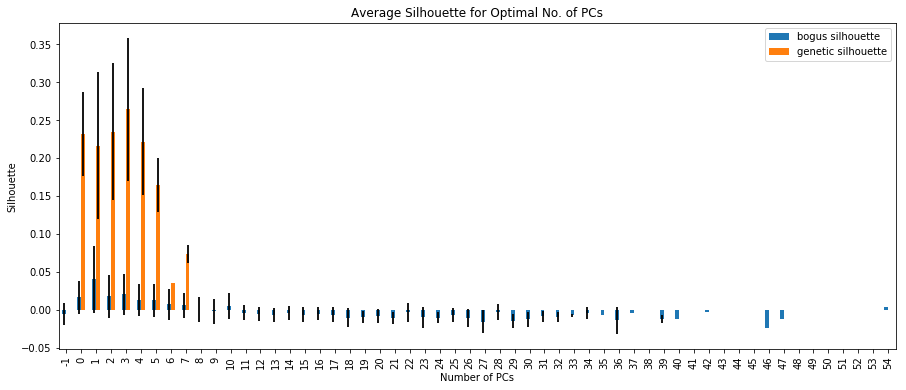

In [33]:
bog = gstats.groupby('bogus silhouette dims')['bogus silhouette']
gen = gstats.groupby('genetic silhouette dims')['genetic silhouette']

bmeans = bog.mean()
gmeans = gen.mean()

bstd = bog.std()
gstd = gen.std()

gmeans.sort_index(inplace=True)
gstd.sort_index(inplace=True)

gmeans.loc[-1] = 0
gstd.loc[-1] = 0

for i in range(gmeans.index.max()+1,bmeans.index.max()+1):
    gmeans.loc[i] = 0
    gstd.loc[i] = 0
    
means = pd.DataFrame([bmeans,gmeans])
stds = pd.DataFrame([bstd,gstd])

fig,ax = plt.subplots(figsize=(15,6))
ax.set_title("Average Silhouette for Optimal No. of PCs")
ax.set_xlabel("Number of PCs")
ax.set_ylabel("Silhouette")
means.transpose().plot.bar(yerr=stds.transpose(),ax=ax)

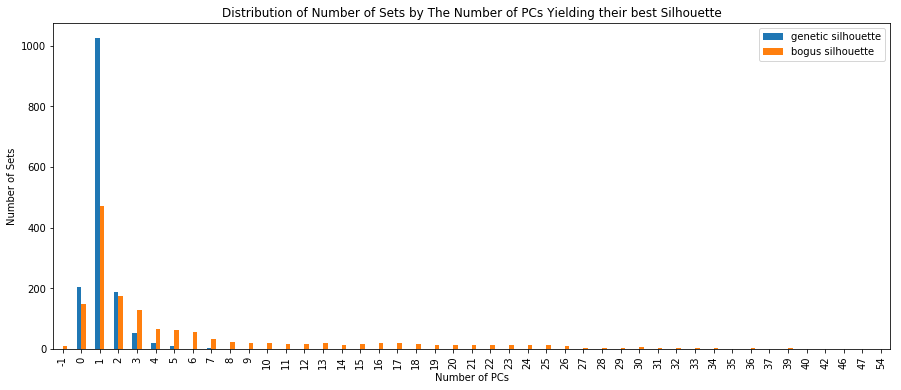

In [34]:
bcounts = bog.count()
gcounts = gen.count()
for i in range(gmeans.index.max()+1,bmeans.index.max()+1):
    gcounts.loc[i] = 0

fig,ax = plt.subplots(figsize=(15,6))
ax.set_ylabel("Number of Sets")
ax.set_xlabel("Number of PCs")
ax.set_title("Distribution of Number of Sets by The Number of PCs Yielding their best Silhouette")
counts = pd.DataFrame([gcounts,bcounts])
counts.transpose().plot.bar(ax=ax)

plt.show()

### This Graph Probably Says It All

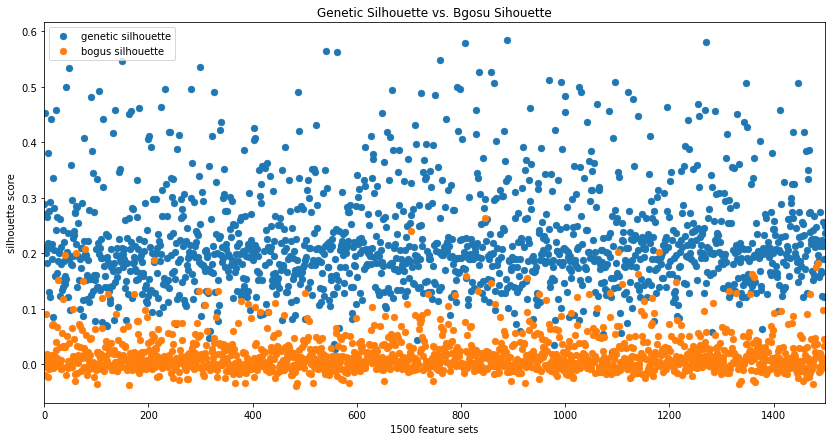

In [35]:
fig,ax = plt.subplots()
ax.set_ylabel("silhouette score")
ax.set_xlabel("1500 feature sets")
ax.set_title("Genetic Silhouette vs. Bgosu Sihouette")
gstats[['genetic silhouette','bogus silhouette']].plot(style='o',figsize=(14,7),ax=ax)

## Some Examples from this Collection

## Example 1:

### The set with the best bogus silhouette

In [36]:
bogmax = groups[gstats['bogus silhouette'].argmax()]
print(bogmax)

5 long group covering 245 languages
in mode PCA:
quality index: 5.53
PC1: 25%
PC2: 17%
fields: 'phonology': 5
features:
18A Absence of Common Consonants
19A Presence of Uncommon Consonants
2A Vowel Quality Inventories
8A Lateral Consonants
9A The Velar Nasal
family1: 15 (Austronesian)
family2: 14 (Altaic)

genetic separation: 0.26 (0 PCs)
bogus separation: 0.26 (1 PCs)


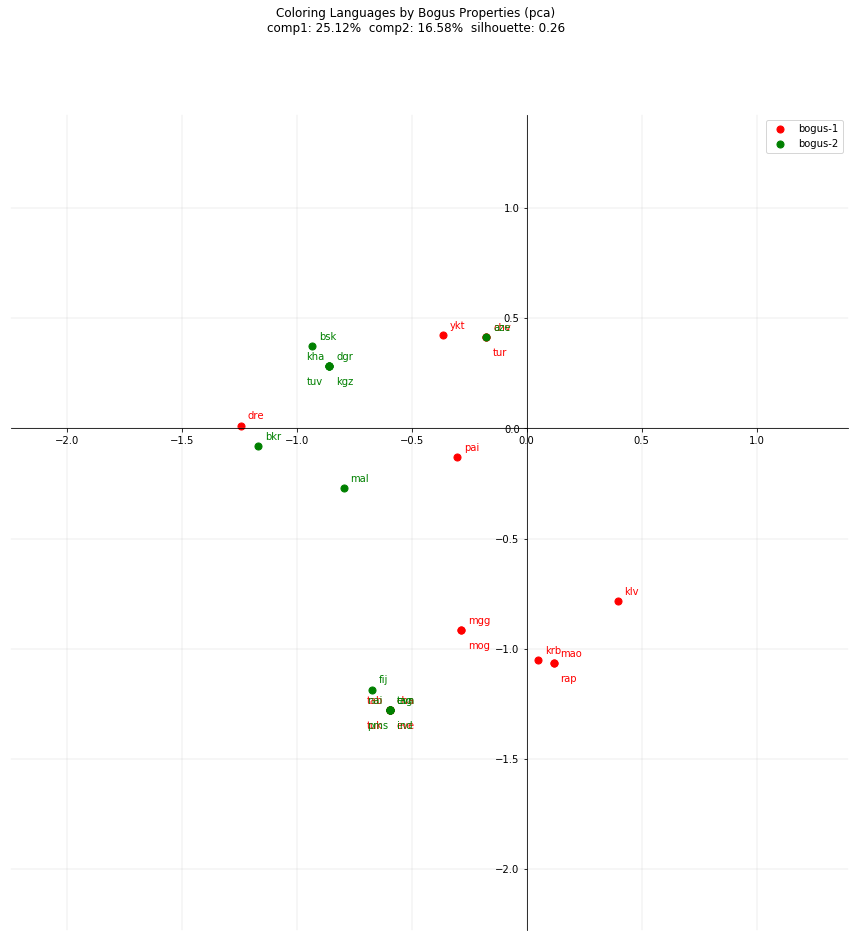

In [37]:
bogmax.plot_bogus()

### Example 1 -- colored by family 

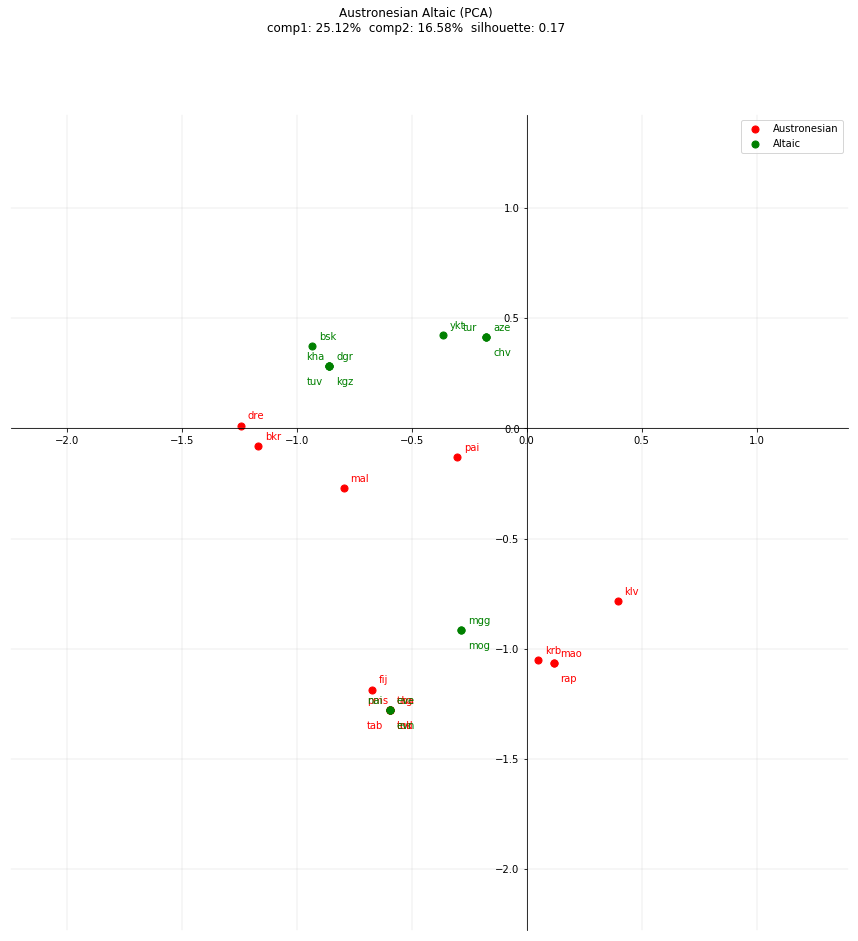

In [38]:
bogmax.plot_families()

### Example 1 -- showing all two-way separations of the top families

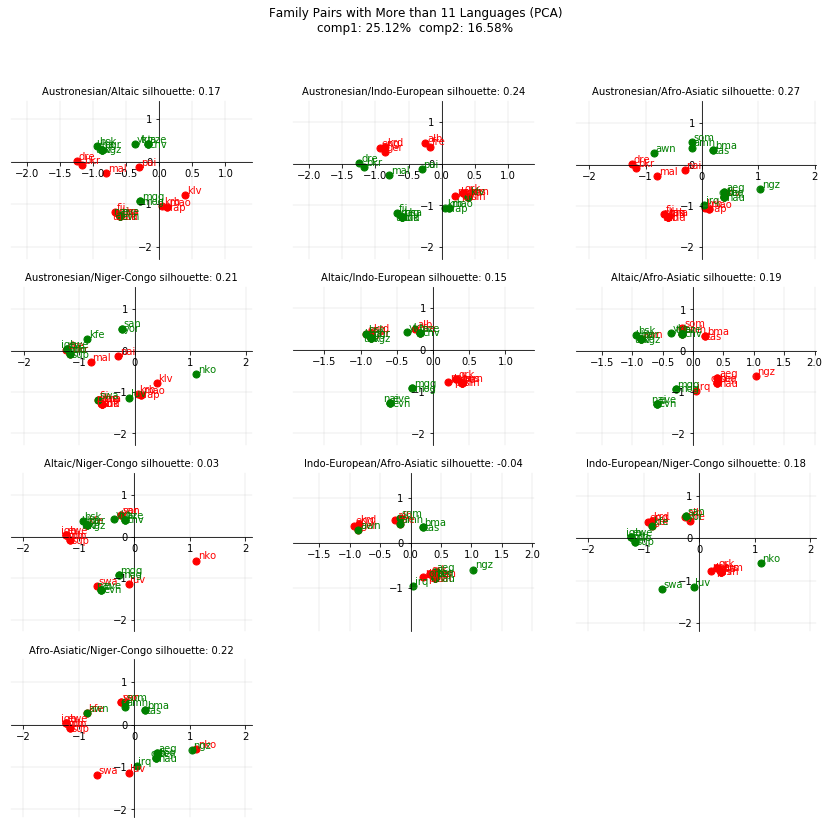

In [39]:
bogmax.plot_multifam()

### Of  Course, the set with the worst bogus silhouette doesn't look like anything

## Example 2 -- worst bogus silhouette

In [40]:
bogmin = groups[gstats['bogus silhouette'].argmin()]
print(bogmin)

9 long group covering 230 languages
in mode PCA:
quality index: 6.83
PC1: 17%
PC2: 14%
fields: 'phonology': 9
features:
11A Front Rounded Vowels
13A Tone
19A Presence of Uncommon Consonants
3A Consonant-Vowel Ratio
4A Voicing in Plosives and Fricatives
5A Voicing and Gaps in Plosive Systems
6A Uvular Consonants
7A Glottalized Consonants
9A The Velar Nasal
family1: 15 (Austronesian)
family2: 14 (Altaic)

genetic separation: 0.23 (0 PCs)
bogus separation: -0.04 (23 PCs)


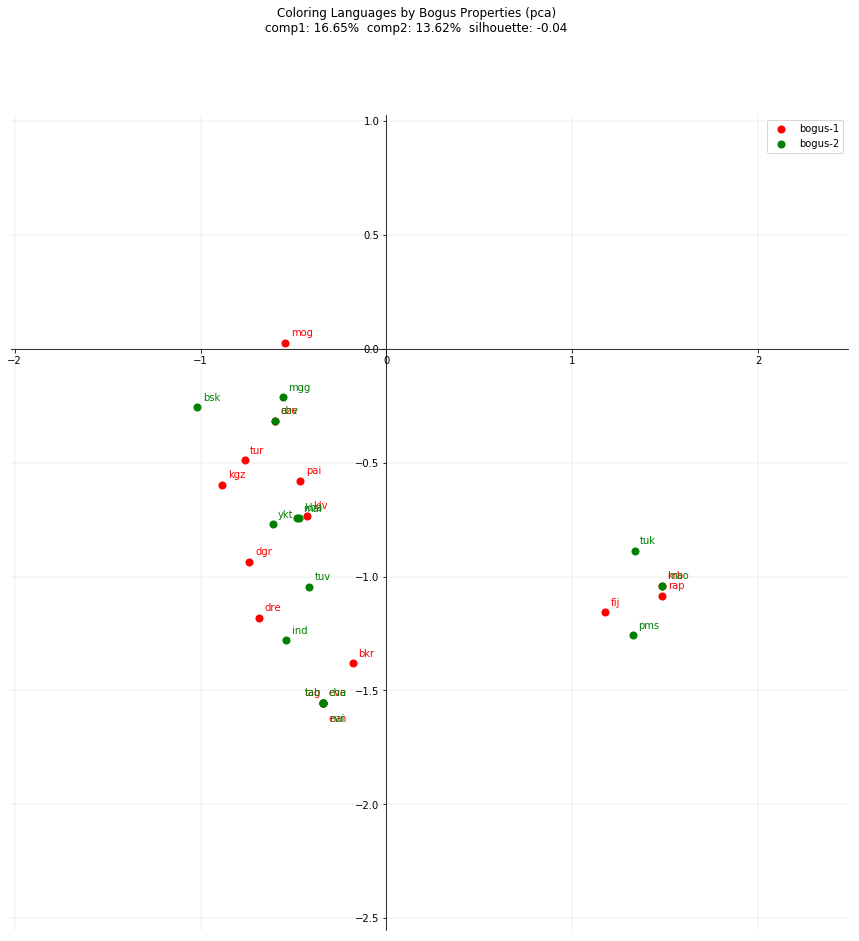

In [41]:
bogmin.plot_bogus()

### Example 2 --  colored by family

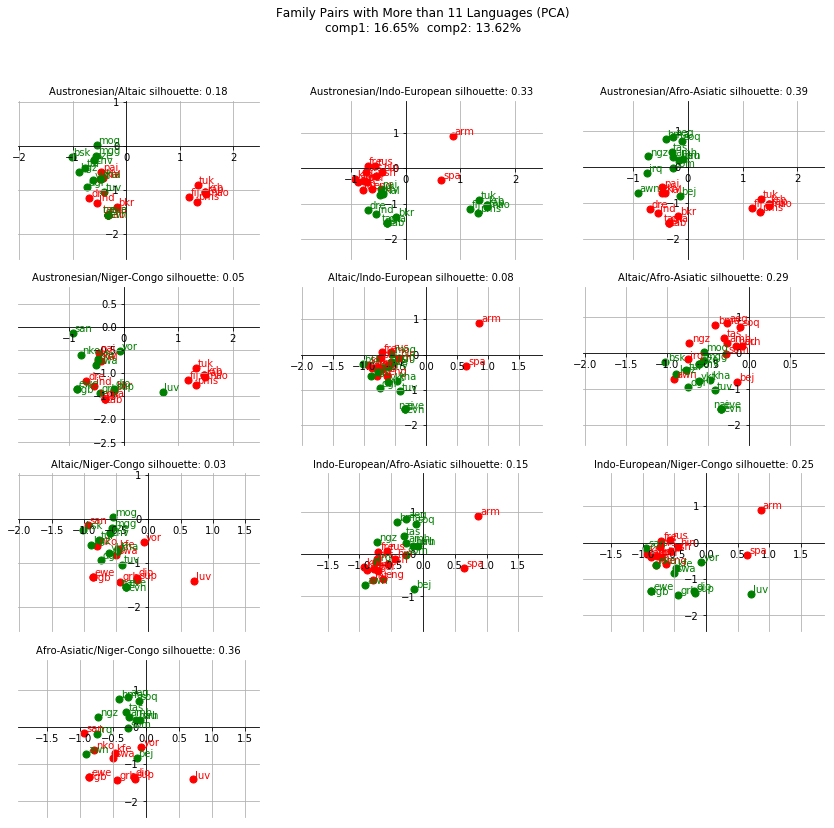

In [18]:
bogmin.plot_multifam()

## Example 3 -- The set with the most languages in family 1

In [42]:
maxfams = groups[gstats['family 1'].argmax()]

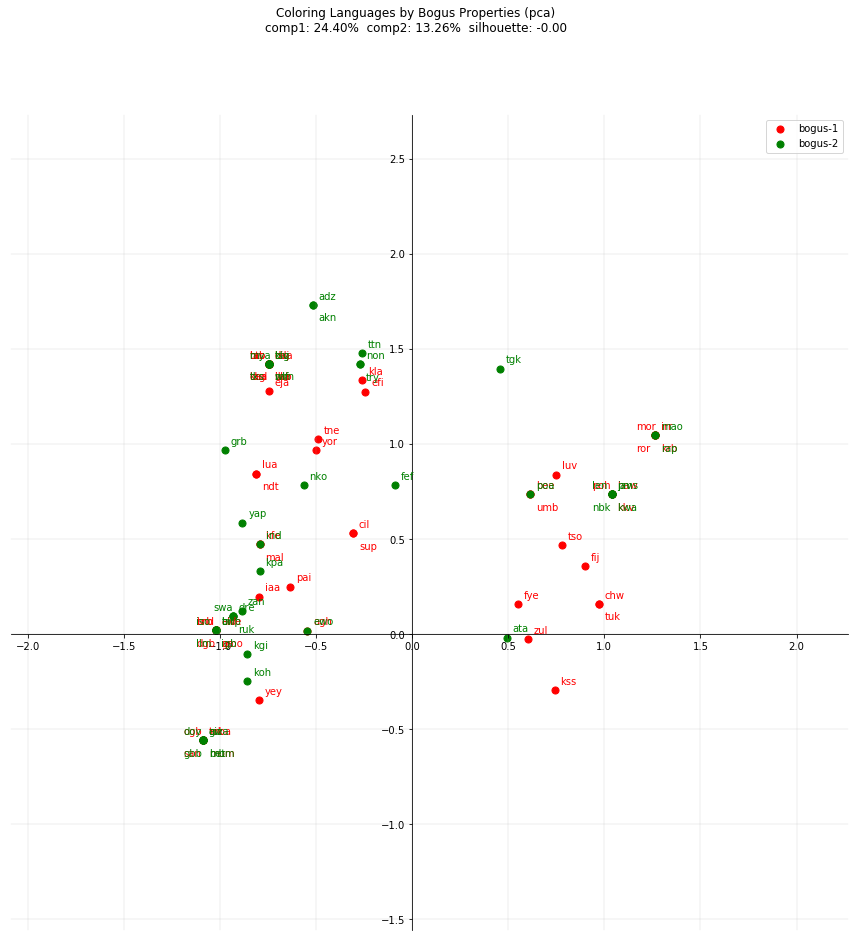

In [43]:
maxfams.plot_bogus()

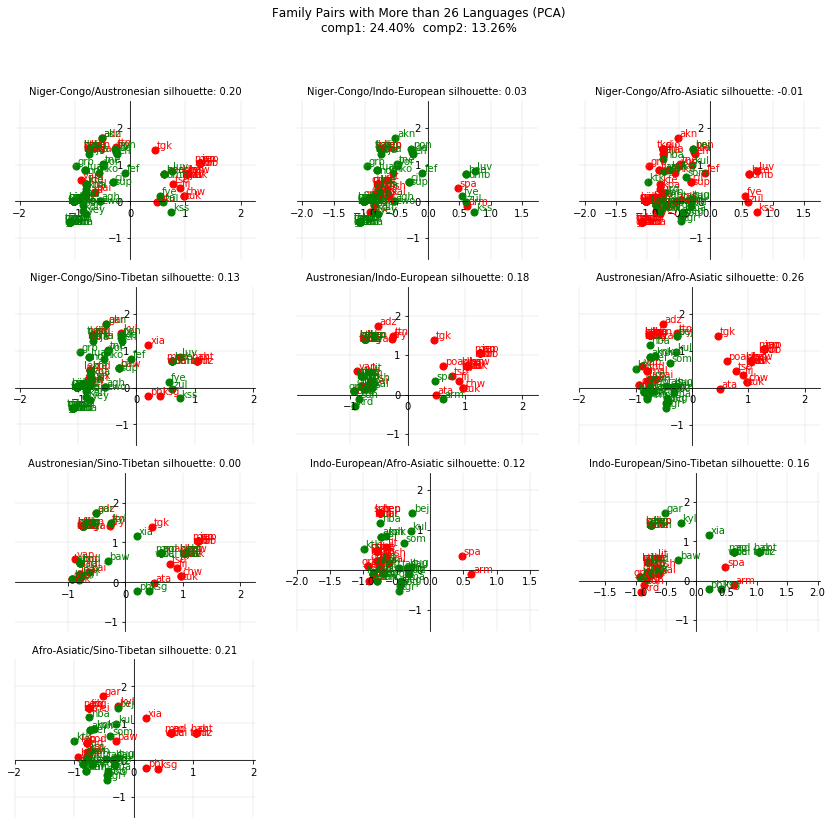

In [44]:
maxfams.plot_multifam()

###  Example 3 -- top families, MCA

In [45]:
maxfams.mode = 'mca'

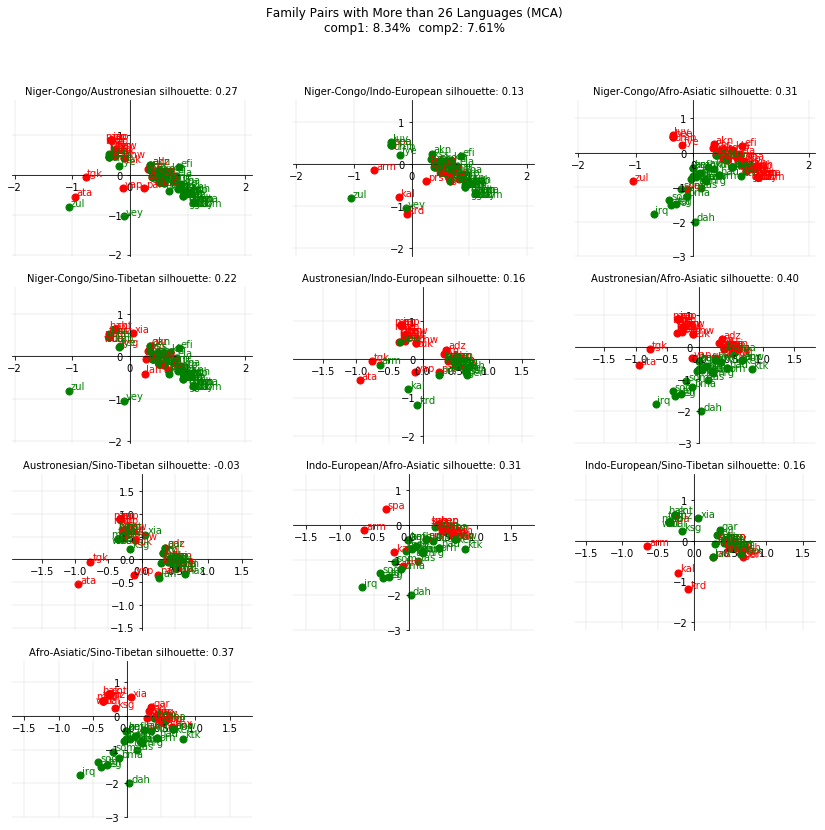

In [46]:
maxfams.plot_multifam()

## Finaly, the set with best genetic separation. 
### Remeber, these sets were picked at random, never selected for high genetic silhouette

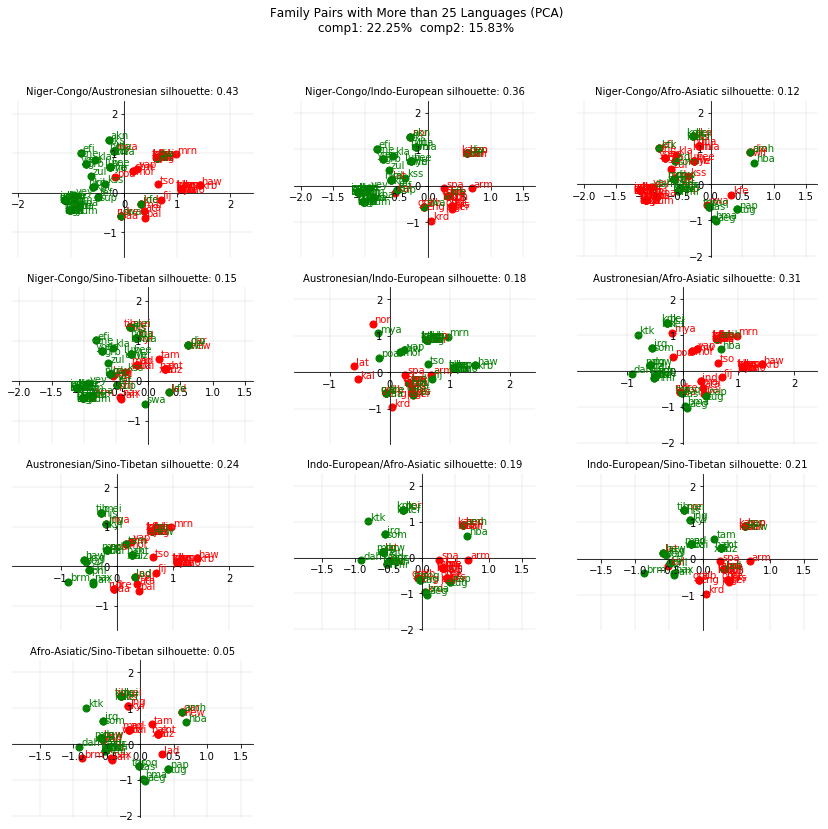

In [47]:
maxgen = groups[gstats['genetic silhouette'].argmax()]
maxgen.plot_multifam()

### MCA

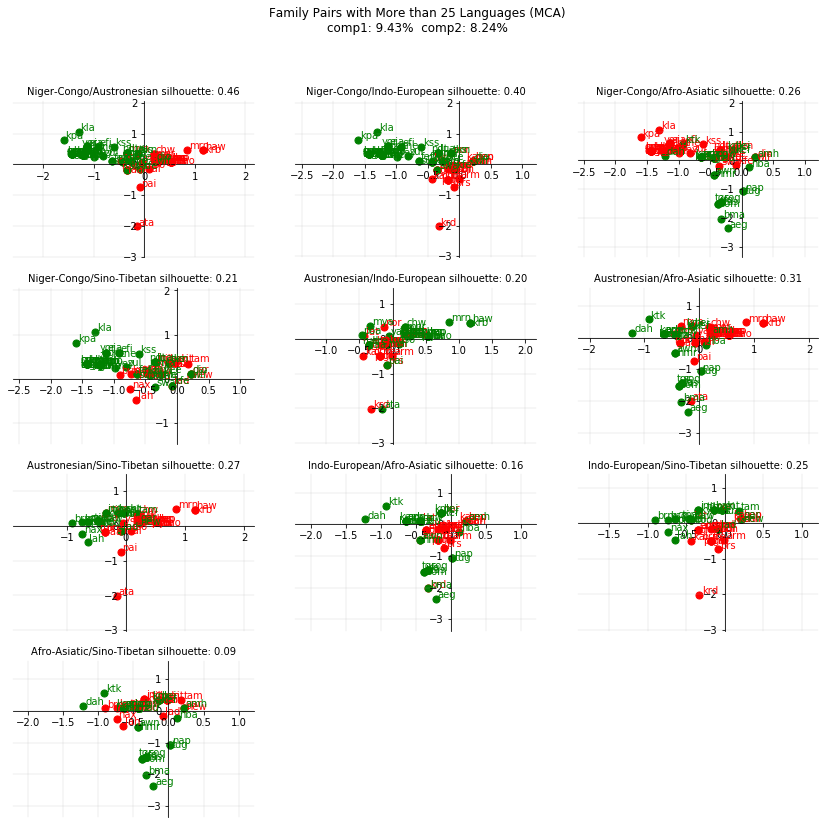

In [48]:
maxgen.mode = 'mca'
maxgen.plot_multifam()

## Significant Features

### Average Contribution of Features in the top 200 Languages in terms of Bogus Clustering

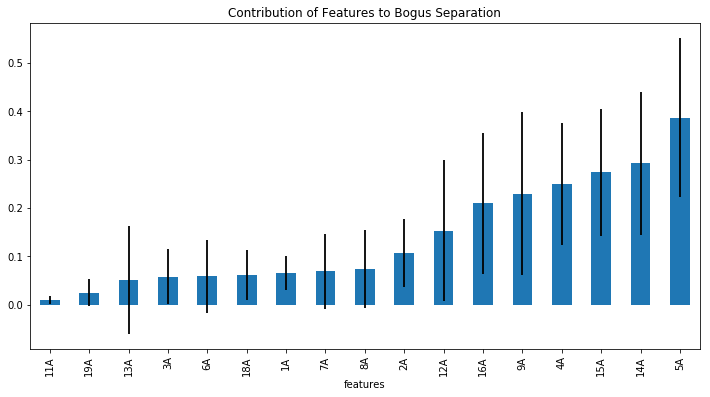

In [62]:
loadings = agstats(sorted(groups,key=lambda g : g.best_silhouette('bogus')[0],reverse=True)[:200])
loadings.sort_values(by='mean_loading',inplace=True)
d1 = loadings.loc['component 1'][['mean_loading','std','participation']].dropna()
d1['mean_loading'].plot.bar(yerr=d1['std'],figsize=(12,6),title="Contribution of Features to Bogus Separation")

## And for the True Clustering (top 200 feature sets)

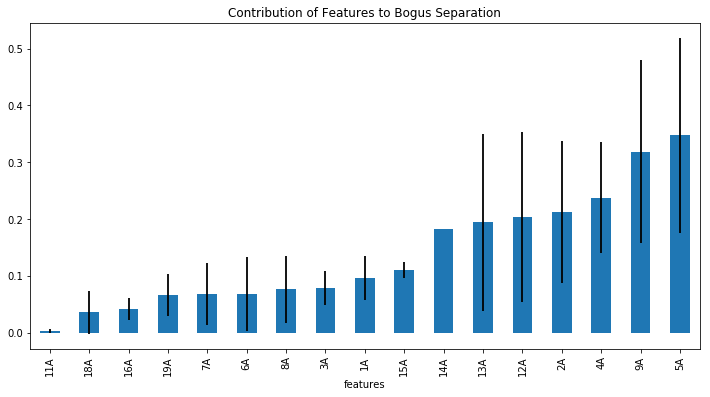

In [64]:
loadings = agstats(sorted(groups,key=lambda g : g.best_silhouette('genetic',2)[0],reverse=True)[:200])
loadings.sort_values(by='mean_loading',inplace=True)
d2 = loadings.loc['component 1'][['mean_loading','std','participation']].dropna()
d2['mean_loading'].plot.bar(yerr=d2['std'],figsize=(12,6),title="Contribution of Features to Bogus Separation")

## Note, 
that 5A figures highly in both. I suppose it's mean loadibg over the entire collection is high.


## Silhoutte Score by Spectral Index

### The spectral indices are divided to 10 value bins, this grph shows the average silhouette score for each bin, for the bogus and true clustering.

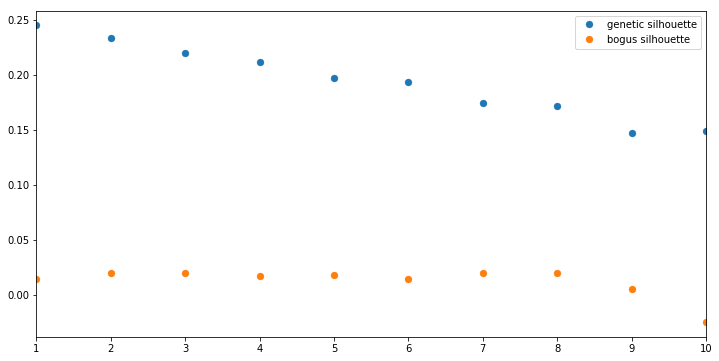

In [66]:
bins = np.linspace(gstats['spectral index'].min(), gstats['spectral index'].max(), 10)
gstats.groupby(np.digitize(gstats['spectral index'],bins))['genetic silhouette','bogus silhouette'].mean().plot(style='o',figsize=(12,6))

Strangely, we can see that the true silhouette decreces where the quality index increases. The bogus silhouette doesn't show any pattern at all

In [67]:
bins

array([  5.00190376,   5.64280729,   6.28371082,   6.92461436,
         7.56551789,   8.20642142,   8.84732495,   9.48822849,
        10.12913202,  10.77003555])

However, there are a lot more feature sets in the lower bins:

In [75]:
fd = nltk.FreqDist(np.digitize(gstats['spectral index'],bins))
fd.tabulate()

  1   2   3   4   5   6   7   8   9  10 
355 347 302 185 128 112  44  21   5   1 


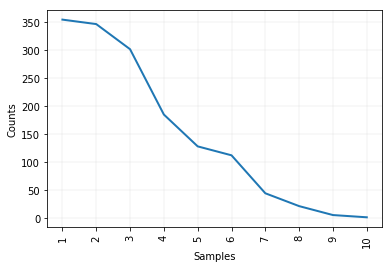

In [76]:
fd.plot()

# Bogus Features

### Following are some
statistics on a collection of 1500 feature sets that:
    
   1. Have the Phonology feature names
    
   2. Cover together 200 languages at least
    
   3. Are bogus -- meaning the distribution of categories has been maintained,  but the values are all scrambled so that 5A here, for example, is distributed like the real 5A of the same languages, but the value of each language for this feature is random.

In [80]:
bgroups = pd.read_pickle('phon-bog-200-q5-bestsil1500.pkl')
bgroups.sort(key = lambda g: g.best_silhouette('genetic',4))

In [81]:
bgstats = list()
for g in bgroups:
    g.determine_spectral_data()
    top2fams = g.families.most_common(2)
    gen2 = g.best_silhouette('genetic',2)
    gen4 = g.best_silhouette('genetic',4)
    if gen2 and gen4:
        bgstats.append({
            'spectral index' : g.quality_index,
            'gen2' : gen2[0],
            'gen2 dims' : gen2[1],
            'gen4' : gen4[0],
            'gen4 dims' : gen4[1],
            'family 1' : top2fams[0][1],
            'family 2' : top2fams[1][1]
        })
bgstats = pd.DataFrame(bgstats)

In [82]:
bgstats.describe()

,family 1,family 2,gen2,gen2 dims,gen4,gen4 dims,spectral index
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.430000,23.718667,0.024148,2.559333,-0.038179,23.894000,5.511599
std,10.883875,8.477859,0.024678,2.522444,0.012742,11.310882,0.324626
min,15.000000,12.000000,0.006057,-1.000000,-0.153837,-1.000000,4.670467
25%,25.000000,21.000000,0.012152,1.000000,-0.043218,16.000000,5.291590
50%,25.000000,21.000000,0.018154,2.000000,-0.035242,22.000000,5.485121
75%,25.000000,21.000000,0.026386,3.000000,-0.029831,32.000000,5.682108
max,56.000000,45.000000,0.158574,15.000000,-0.019416,65.000000,7.507671


Here we can already see that the average for the 2-cluster score is around 0.

In [83]:
df = pd.DataFrame({'true genetic': gstats['genetic silhouette'].values, 'bogus genetic' : bgstats['gen2'].values})

Like above, this graph I think shows the difference most clearly. In orange you have silhouette score by family where the features are bogus, in blue we have the scores from the above collection. (note that the blue scores are for sets selected for their bogus silhouette scores, not the real ones and still...)

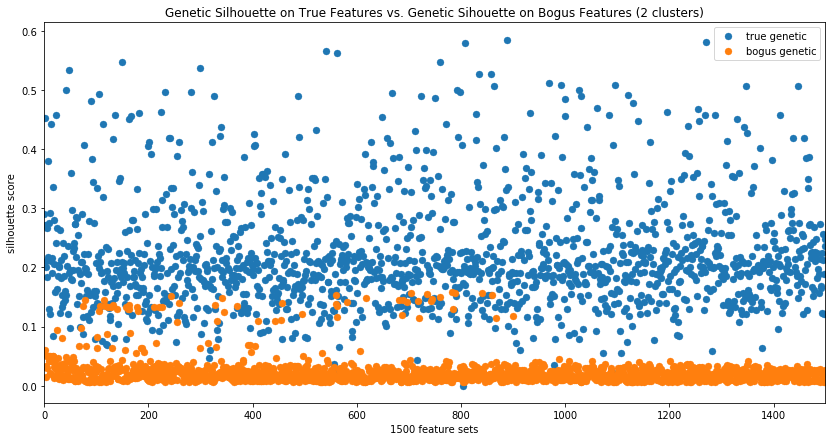

In [85]:
fig,ax = plt.subplots()
ax.set_ylabel("silhouette score")
ax.set_xlabel("1500 feature sets")
ax.set_title("Genetic Silhouette on True Features vs. Genetic Sihouette on Bogus Features (2 clusters)")
df[['true genetic','bogus genetic']].plot(style='o',figsize=(14,7),ax=ax)

There is also no correlation between the 2-clusters and 4-clusters scores

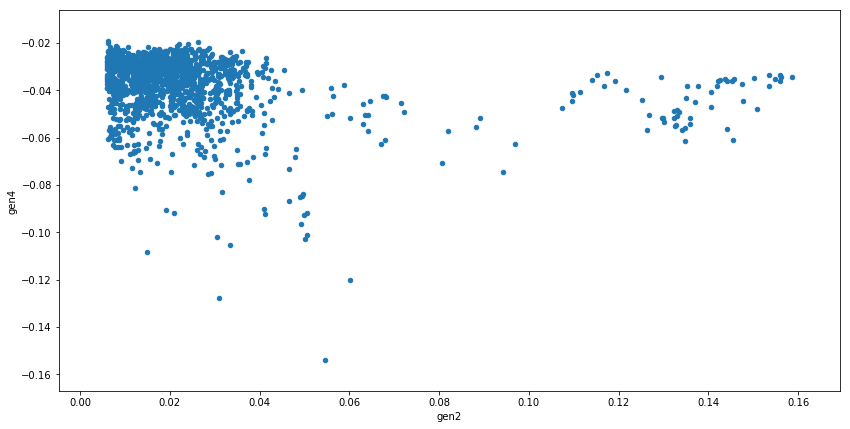

In [86]:
bgstats.plot.scatter(x='gen2',y='gen4',figsize=(14,7))

## Important (bogus) Features

In [87]:
bloadings = agstats(sorted(bgroups,key=lambda g : g.best_silhouette('genetic',2)[0],reverse=True))

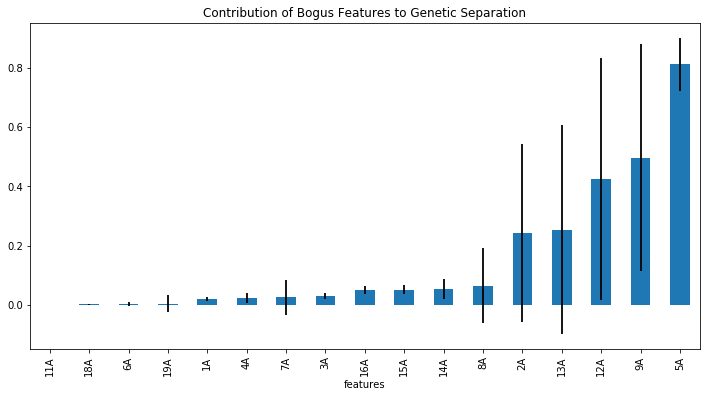

In [90]:
bloadings.sort_values(by='mean_loading',inplace=True)
b = bloadings.loc['component 1'][['mean_loading','std','participation']].dropna()
b['mean_loading'].plot.bar(yerr=b['std'],figsize=(12,6),title="Contribution of Bogus Features to Genetic Separation")

## But!
### Again 5A (also 9A,12A and 13A) take the lead. How come?